## Programming for AI - Project File A

In [77]:
import pandas as pd

# Load the dataset
df = pd.read_csv("Titanic-Dataset.csv")

In [78]:
df.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S


In [79]:
df.tail()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
886,887,0,2,"Montvila, Rev. Juozas",male,27.0,0,0,211536,13.00,NaN,S
887,888,1,1,"Graham, Miss. Margaret Edith",female,19.0,0,0,112053,30.00,B42,S
888,889,0,3,"Johnston, Miss. Catherine Helen ""Carrie""",female,NaN,1,2,W./C. 6607,23.45,NaN,S
889,890,1,1,"Behr, Mr. Karl Howell",male,26.0,0,0,111369,30.00,C148,C
890,891,0,3,"Dooley, Mr. Patrick",male,32.0,0,0,370376,7.75,NaN,Q


In [80]:
# Dataset shape
print("Dataset shape (rows, columns):", df.shape)

# Column names
print("\nColumns in the dataset:")
df.columns

Dataset shape (rows, columns): (891, 12)

Columns in the dataset:


Index(['PassengerId', 'Survived', 'Pclass', 'Name', 'Sex', 'Age', 'SibSp',
       'Parch', 'Ticket', 'Fare', 'Cabin', 'Embarked'],
      dtype='object')

In [81]:
# Detailed dataset information
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 12 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   PassengerId  891 non-null    int64  
 1   Survived     891 non-null    int64  
 2   Pclass       891 non-null    int64  
 3   Name         891 non-null    object 
 4   Sex          891 non-null    object 
 5   Age          714 non-null    float64
 6   SibSp        891 non-null    int64  
 7   Parch        891 non-null    int64  
 8   Ticket       891 non-null    object 
 9   Fare         891 non-null    float64
 10  Cabin        204 non-null    object 
 11  Embarked     889 non-null    object 
dtypes: float64(2), int64(5), object(5)
memory usage: 83.7+ KB


<Axes: >

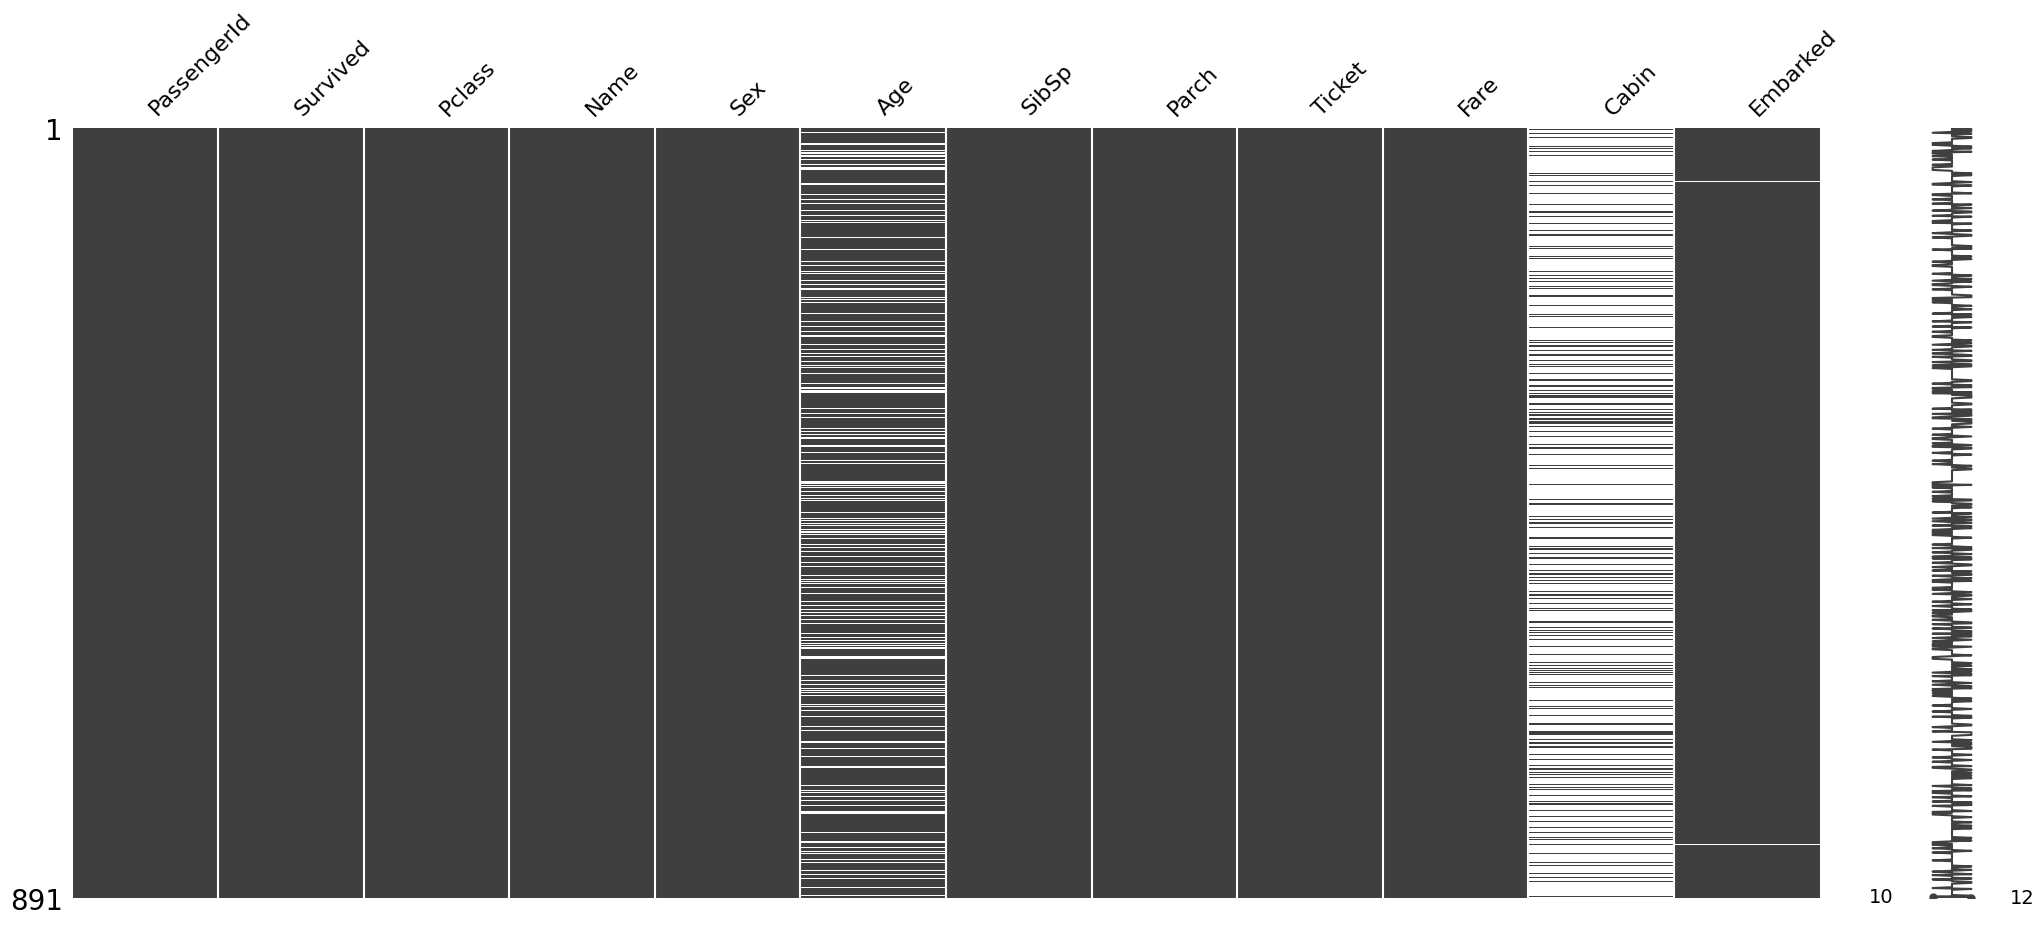

In [82]:
import missingno

missingno.matrix(df)

In [83]:
df.isna().sum()

PassengerId      0
Survived         0
Pclass           0
Name             0
Sex              0
Age            177
SibSp            0
Parch            0
Ticket           0
Fare             0
Cabin          687
Embarked         2
dtype: int64

In [84]:
# Drop columns with excessive missing values or not to be used in simple models
df = df.drop(columns=["Cabin"])

df = df.drop(columns=["PassengerId"])

print("Columns after dropping Cabin:")
df.columns

Columns after dropping Cabin:


Index(['Survived', 'Pclass', 'Name', 'Sex', 'Age', 'SibSp', 'Parch', 'Ticket',
       'Fare', 'Embarked'],
      dtype='object')

In [85]:
df["Age"] = df["Age"].fillna(df["Age"].median())

In [86]:
df["Embarked"] = df["Embarked"].fillna(df["Embarked"].mode()[0])

In [87]:
# Median age by passenger class
# df.groupby("Pclass")["Age"].median()

In [88]:
# Fill missing Age using both Pclass and Sex
# df["Age"] = df.groupby(["Pclass", "Sex"])["Age"].transform(
#     lambda x: x.fillna(x.median())
# )

<Axes: >

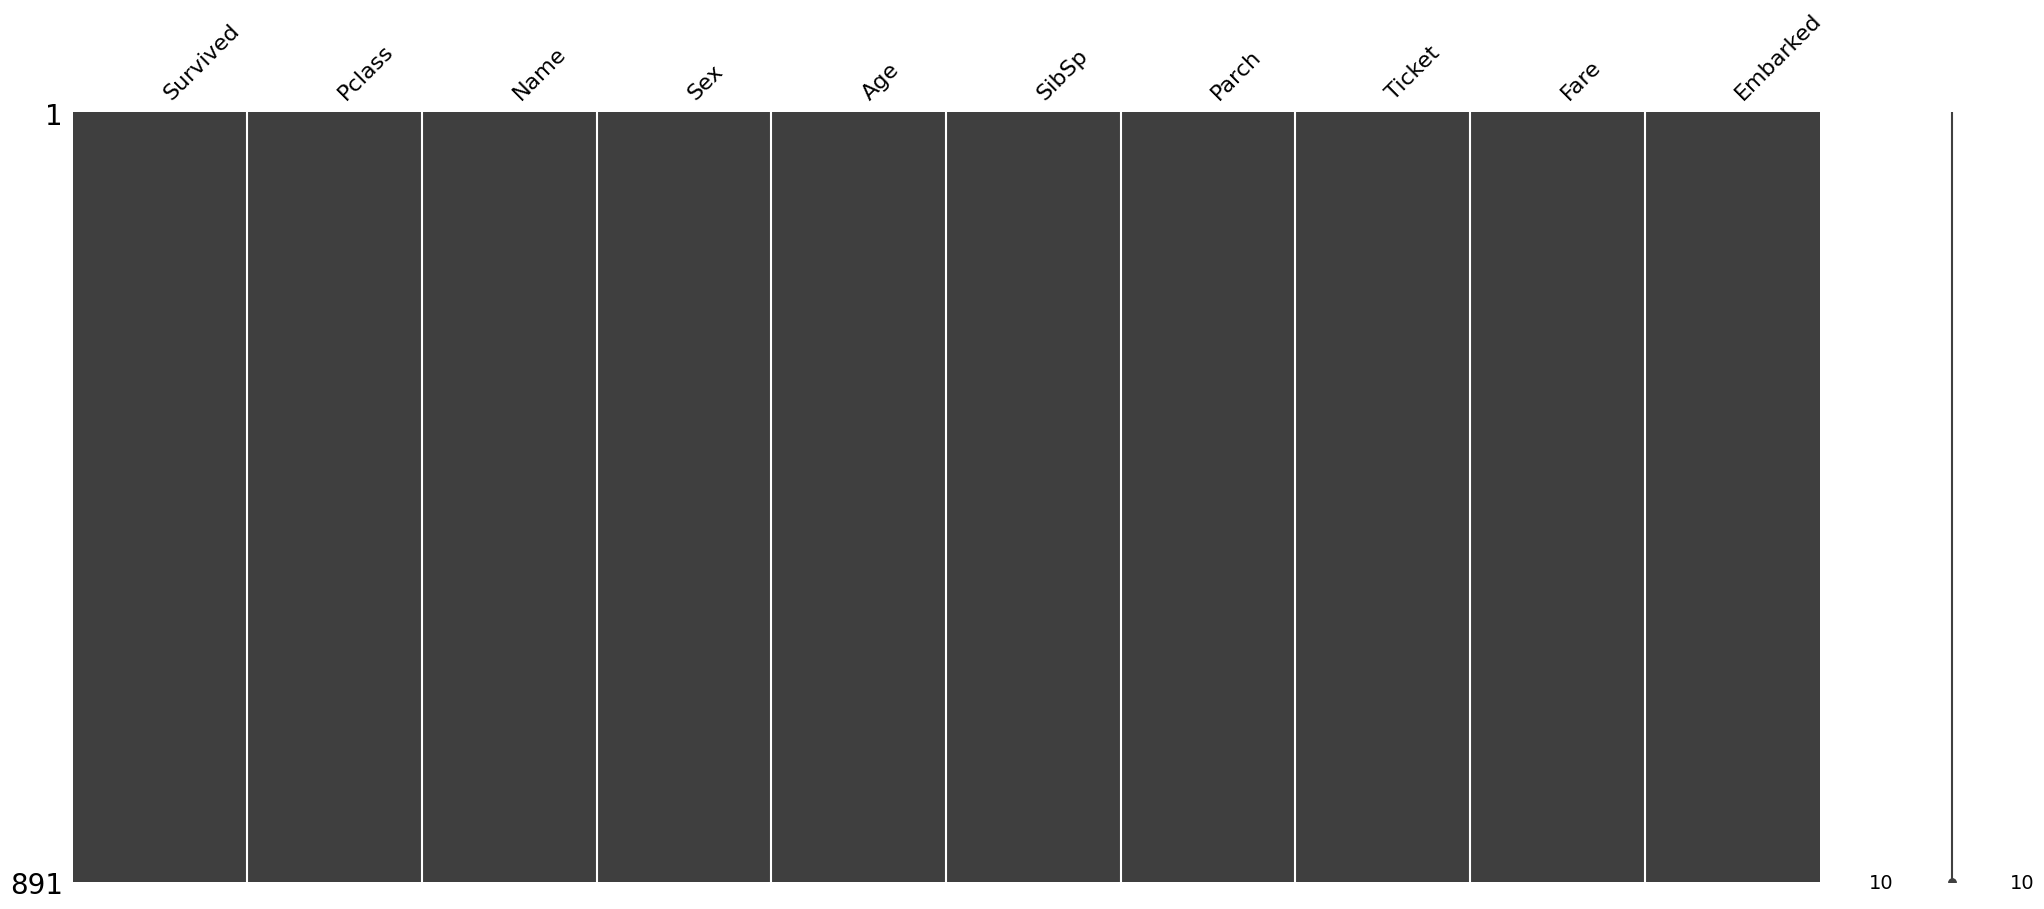

In [89]:
# Verify missing values after improved age imputation
missingno.matrix(df)


In [90]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 10 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   Survived  891 non-null    int64  
 1   Pclass    891 non-null    int64  
 2   Name      891 non-null    object 
 3   Sex       891 non-null    object 
 4   Age       891 non-null    float64
 5   SibSp     891 non-null    int64  
 6   Parch     891 non-null    int64  
 7   Ticket    891 non-null    object 
 8   Fare      891 non-null    float64
 9   Embarked  891 non-null    object 
dtypes: float64(2), int64(4), object(4)
memory usage: 69.7+ KB


In [91]:
num_cols = df.select_dtypes(include=["int64", "float64"]).columns
num_cols

Index(['Survived', 'Pclass', 'Age', 'SibSp', 'Parch', 'Fare'], dtype='object')

In [92]:
# Summary statistics for Fare
df["Fare"].describe()

count    891.000000
mean      32.204208
std       49.693429
min        0.000000
25%        7.910400
50%       14.454200
75%       31.000000
max      512.329200
Name: Fare, dtype: float64

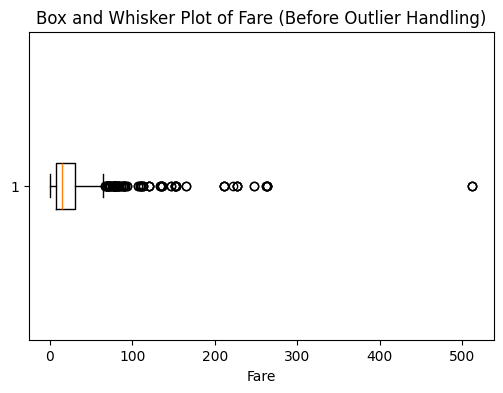

In [93]:
import matplotlib.pyplot as plt

plt.figure(figsize=(6, 4))
plt.boxplot(df["Fare"], vert=False)
plt.title("Box and Whisker Plot of Fare (Before Outlier Handling)")
plt.xlabel("Fare")
plt.show()

In [94]:
Q1 = df["Fare"].quantile(0.25)
Q3 = df["Fare"].quantile(0.75)
IQR = Q3 - Q1

lower_bound = Q1 - 1.5 * IQR
upper_bound = Q3 + 1.5 * IQR

df["Fare"] = df["Fare"].clip(lower_bound, upper_bound)

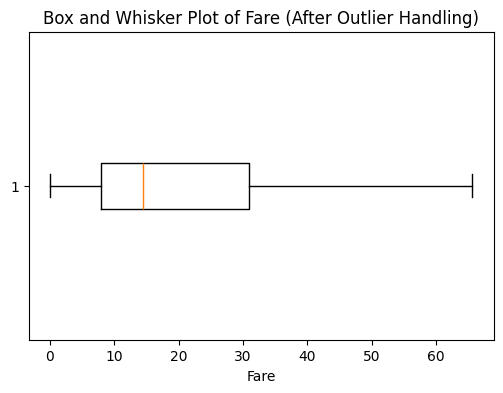

In [95]:
import matplotlib.pyplot as plt

plt.figure(figsize=(6, 4))
plt.boxplot(df["Fare"], vert=False)
plt.title("Box and Whisker Plot of Fare (After Outlier Handling)")
plt.xlabel("Fare")
plt.show()

In [96]:
df["Fare"].describe()

count    891.000000
mean      24.046813
std       20.481625
min        0.000000
25%        7.910400
50%       14.454200
75%       31.000000
max       65.634400
Name: Fare, dtype: float64

<Axes: >

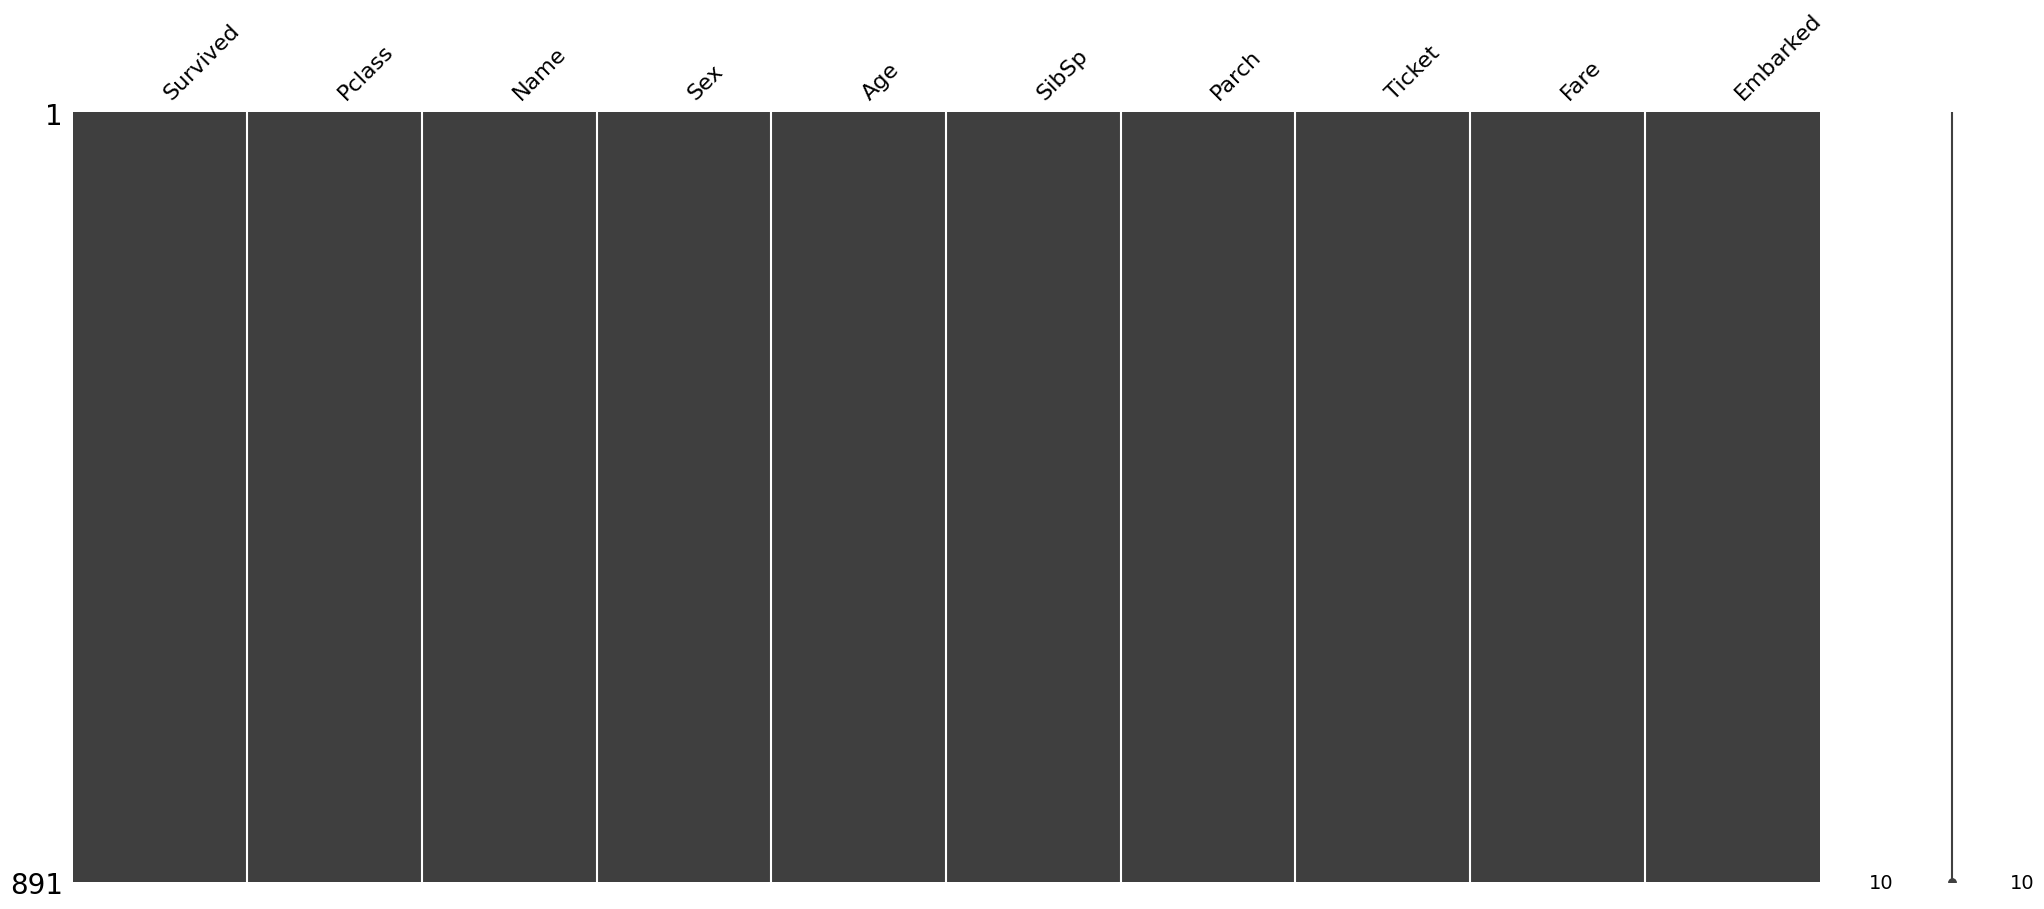

In [97]:
# Verify missing values after improved age imputation
missingno.matrix(df)

In [98]:
# Numerical columns (excluding target if present)
num_cols = df.select_dtypes(include=["int64", "float64"]).columns.tolist()
num_cols

['Survived', 'Pclass', 'Age', 'SibSp', 'Parch', 'Fare']

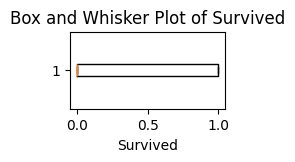

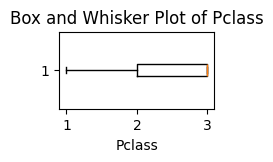

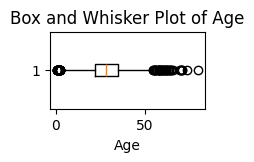

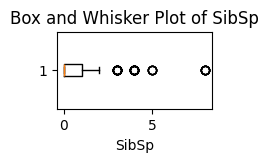

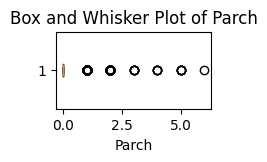

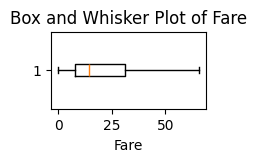

In [99]:
import matplotlib.pyplot as plt

for col in num_cols:
    plt.figure(figsize=(2, 1))
    plt.boxplot(df[col], vert=False)
    plt.title(f"Box and Whisker Plot of {col}")
    plt.xlabel(col)
    plt.show()

In [100]:
# IQR method for Age (optional)
Q1 = df["Age"].quantile(0.25)
Q3 = df["Age"].quantile(0.75)
IQR = Q3 - Q1

lower_bound = Q1 - 1.5 * IQR
upper_bound = Q3 + 1.5 * IQR

df["Age"] = df["Age"].clip(lower_bound, upper_bound)


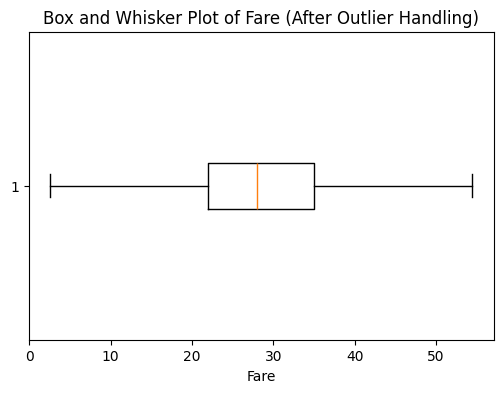

In [101]:
import matplotlib.pyplot as plt

plt.figure(figsize=(6, 4))
plt.boxplot(df["Age"], vert=False)
plt.title("Box and Whisker Plot of Fare (After Outlier Handling)")
plt.xlabel("Fare")
plt.show()

## Step 6: Feature Engineering (Grouping + One-Hot Encoding)

In [102]:
# (high-cardinality text fields)
drop_cols = [c for c in ["Name", "Ticket", "Cabin"] if c in df.columns]
df = df.drop(columns=drop_cols)

df.columns

Index(['Survived', 'Pclass', 'Sex', 'Age', 'SibSp', 'Parch', 'Fare',
       'Embarked'],
      dtype='object')

In [103]:
# Create FamilySize feature
df["FamilySize"] = df["SibSp"] + df["Parch"] + 1

df[["SibSp", "Parch", "FamilySize"]].head()


,SibSp,Parch,FamilySize
0,1,0,2
1,1,0,2
2,0,0,1
3,1,0,2
4,0,0,1


In [104]:
df[["SibSp", "Parch", "FamilySize"]].tail()

,SibSp,Parch,FamilySize
886,0,0,1
887,0,0,1
888,1,2,4
889,0,0,1
890,0,0,1


In [105]:
# Create IsAlone feature
df["IsAlone"] = (df["FamilySize"] == 1).astype(int)

df[["FamilySize", "IsAlone"]].head()

,FamilySize,IsAlone
0,2,0
1,2,0
2,1,1
3,2,0
4,1,1


In [106]:
# Drop original family columns
df = df.drop(columns=["SibSp", "Parch"])

In [107]:
# One-Hot Encoding categorical variables
cat_cols = ["Sex", "Embarked"]

df_encoded = pd.get_dummies(df, columns=cat_cols, drop_first=True)

In [108]:
df_encoded.head()

,Survived,Pclass,Age,Fare,FamilySize,IsAlone,Sex_male,Embarked_Q,Embarked_S
0,0,3,22.0,7.2500,2,0,True,False,True
1,1,1,38.0,65.6344,2,0,False,False,False
2,1,3,26.0,7.9250,1,1,False,False,True
3,1,1,35.0,53.1000,2,0,False,False,True
4,0,3,35.0,8.0500,1,1,True,False,True


In [109]:
df_encoded.info()


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 9 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   Survived    891 non-null    int64  
 1   Pclass      891 non-null    int64  
 2   Age         891 non-null    float64
 3   Fare        891 non-null    float64
 4   FamilySize  891 non-null    int64  
 5   IsAlone     891 non-null    int64  
 6   Sex_male    891 non-null    bool   
 7   Embarked_Q  891 non-null    bool   
 8   Embarked_S  891 non-null    bool   
dtypes: bool(3), float64(2), int64(4)
memory usage: 44.5 KB


In [110]:
df_encoded.select_dtypes(include="object").columns

Index([], dtype='object')

In [111]:
df_encoded.select_dtypes(include="bool").columns

Index(['Sex_male', 'Embarked_Q', 'Embarked_S'], dtype='object')

In [112]:
# Convert boolean columns to integers
bool_cols = df_encoded.select_dtypes(include="bool").columns
df_encoded[bool_cols] = df_encoded[bool_cols].astype(int)

In [113]:
df_encoded.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 9 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   Survived    891 non-null    int64  
 1   Pclass      891 non-null    int64  
 2   Age         891 non-null    float64
 3   Fare        891 non-null    float64
 4   FamilySize  891 non-null    int64  
 5   IsAlone     891 non-null    int64  
 6   Sex_male    891 non-null    int64  
 7   Embarked_Q  891 non-null    int64  
 8   Embarked_S  891 non-null    int64  
dtypes: float64(2), int64(7)
memory usage: 62.8 KB


### Splitting the data for the model

In [114]:
# Separate features and target variable
X = df_encoded.drop(columns=["Survived"])
y = df_encoded["Survived"]

In [115]:
from sklearn.model_selection import train_test_split

# Split the data
X_train, X_test, y_train, y_test = train_test_split(
    X,
    y,
    test_size=0.2,
    random_state=42
)

In [116]:
print("Training set shape:", X_train.shape)
print("Testing set shape:", X_test.shape)

print("Training target shape:", y_train.shape)
print("Testing target shape:", y_test.shape)

Training set shape: (712, 8)
Testing set shape: (179, 8)
Training target shape: (712,)
Testing target shape: (179,)


## Step 9: Feature Standardization

Some machine learning models perform better when numerical features
are on a similar scale.

In [117]:
# Identify numerical columns to standardize
num_cols = X_train.select_dtypes(include=["int64", "float64"]).columns

# Exclude binary columns (0/1)
num_cols = [col for col in num_cols if X_train[col].nunique() > 2]

num_cols


['Pclass', 'Age', 'Fare', 'FamilySize']

In [118]:
from sklearn.preprocessing import StandardScaler

scaler = StandardScaler()

# Fit on training data only
X_train[num_cols] = scaler.fit_transform(X_train[num_cols])

# Apply same transformation to test data
X_test[num_cols] = scaler.transform(X_test[num_cols])

In [122]:
from sklearn.linear_model import LogisticRegression

# Create and train the model
model = LogisticRegression(max_iter=1000)
model.fit(X_train, y_train)

print("Model training complete!")

Model training complete!


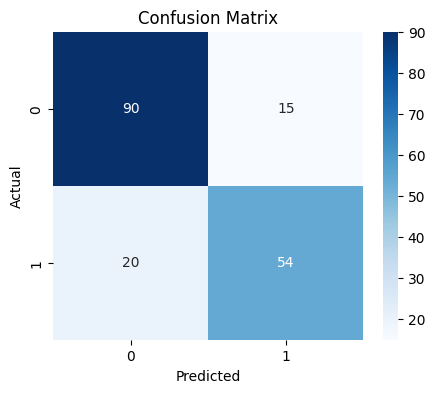

In [123]:
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.metrics import confusion_matrix

cm = confusion_matrix(y_test, y_pred)

plt.figure(figsize=(5, 4))
sns.heatmap(cm, annot=True, fmt="d", cmap="Blues")
plt.xlabel("Predicted")
plt.ylabel("Actual")
plt.title("Confusion Matrix")
plt.show()


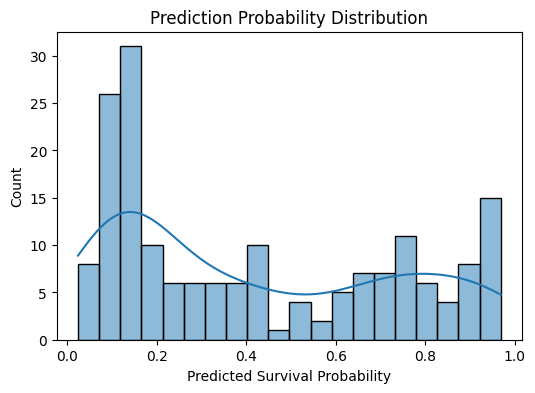

In [121]:
plt.figure(figsize=(6, 4))
sns.histplot(y_prob, bins=20, kde=True)
plt.xlabel("Predicted Survival Probability")
plt.title("Prediction Probability Distribution")
plt.show()
